### Task
Last lesson, we found a theoretical average number of $N_n$ sequences with even number of $n$ ones or zeroes in a row in a random sequence $0$ and $1$ with a length $$L: N_n = L / {2 ^ {n + 1}}. $$
<br> Compare predicted values with the experimentally measured $N^*_ n$, which must be found from the sequences generated by you ([the file with the sequences is attached](https://mail.google.com/mail/u/1?ui=2&ik=7e633e38b7&attid=0.1&permmsgid=msg-f:1629969768567209660&th=169ed0de5a12febc&view=att&disp=safe)).
<br> Calculate $χ^2$ and the corresponding $p$ -value.
<br> Make lower limit of the series $N_n$ not less than $1$, i.e. discard all $n$ for which $N_n<1$, limit the series for $N_n^*$ to the same $n$ so that the length of the rows is the same. The number of degrees of freedom should be equal to the length of the series.
<br> <i><u>Notes:</u></i>
<br> Do all the calculations on your own. To get the distribution function, you can use the scipy.stats.chi2 function (the .cdf method - with a cumulative density function, this is the distribution function). You can compare the results with the built-in tools for comparing Python samples (more accurately, in some places $χ^2$ is not classically defined, I would even say, it is not true).

### Задание 
На прошлом занятии было найдено теоретическое среднее число $N_n$ последовательностей с ровным количеством $n$ единиц или нулей подряд в случайной последовательности $0$ и $1$ длиной $$L: N_n = L/{2^{n+1}}.$$
<br> Сравнить с предсказанными значениями экспериментально измеренные $N^*_n$, которые необходимо найти из последовательностей, сгенерированных вами (файл с последовательностями прилагаю). 
<br> Вычислить $χ^2$ и соответствующее $p$-значение. 
<br> Ограничьте ряд $N_n$ единицей, т.е. отбросьте все $n$, для которых $N_n < 1$, ряд для $N_n^*$ ограничьте тем же самым $n$, чтобы длина рядов была одинаковой. Количество степеней свободы должно быть равно длине ряда. 
<br> <u>_Примечание:_</u>
<br> Все вычисления проведите сами. Для получения функции распределения можете использовать функцию scipy.stats.chi2 (метод .cdf - сumulative density function это и есть функция распределения). Результаты после можете сравнить со встроенными инструментами сравнения выборок Python (аккуратнее, кое-где $χ^2$ определена не классически, я бы даже сказал – неверно).


In [1]:
import random as rm
import numpy as np
import matplotlib.pyplot as plt
import re
from scipy import stats

#### Helper function

In [2]:
def getSubstring(n = 1, char = '0'):
    """ 
    generates substring to be observed and returns it
    """
    s = ''
    for i in range(n):
        s += char
    if char == '0':
        s = '1' + s + '1'
    else:
        s = '0' + s + '0'
    return s;

In [3]:
getSubstring(2, '1')

'0110'

In [4]:
def getTheoreticalNumber(l, n):
    """
    gets the expected number of substrings with n zeros/ones in the string with l symbols long and 
    """
    return l/(2**(n+1))

In [5]:
getTheoreticalNumber(100, 2)

12.5

### Processing data / Обработка данных

In [6]:
r = open("0and1.txt", 'r')
s = r.read()

In [7]:
test_data = re.sub("[^0-9]", "", s.replace(" ", "").replace("\n", "").replace(",", "").replace("[", "2").replace("]","3"))
array = re.split("2|3", test_data)
indexes = [i for i,x in enumerate(array) if x == '']
array = np.delete(array, indexes)

In [8]:
ind_max = 8

### Function to get observed number of substrings

In [9]:
"""if there is no limits for observed series"""
def getNumberForEachRow(array, ind_max, bDebug = True):
    la = len(array)
    results = np.chararray((la, ind_max-1, 3), itemsize=ind_max+1)
    if bDebug:
        print("substring\t planned \t actual nr")
        print("- - - - - - - - - -")
    for j in range(la):
        for i in range(1, ind_max):
            ss = getSubstring(i, '1')
            l = len(array[j])
            a = str(getTheoreticalNumber(l, i))
            b = len(re.findall(ss, array[j]))
            if bDebug:
                print(ss, ' ', a, ' ', b)
            results[j][i-1][0] = str(ss)
            results[j][i-1][1] = a
            results[j][i-1][2] = b
        if bDebug:
            print("- - - - - - - - - -")
    if bDebug:
        print(results)
    return results

In [10]:
def getNumberForEachRow(array, ind_max, bDebug = True, bDoTillZero = False, bShowPlot = False):
    la = len(array)
    
    if bShowPlot:
        subplot_scheme = str(int(la/2)+int(la%2))+'2'
        
    xi_squares = np.zeros(la)
    chi_squares = []
    df = np.zeros(la)
    
    results = []
    results = np.chararray((la, ind_max-1, 3), itemsize=ind_max)
    results[:] = ""
    
    if bShowPlot:
        results[:] = "0"
    
    if bDebug:
        print("substring\t planned \t actual nr")
        print("- - - - - - - - - -")
        
    for j in range(la):
        i = 0
        while True:
            i += 1;
            ss = getSubstring(i, '1')
            l = len(array[j])
            a = str(getTheoreticalNumber(l, i))
            b = len(re.findall(ss, array[j]))
            
            if bDoTillZero and float(a) < 1 or i >= ind_max:
                break;
            
            if bDebug:
                print(ss, ' ', a, ' ', b)

            results[j][i-1][0] = str(ss)
            results[j][i-1][1] = a
            results[j][i-1][2] = b
            
            xi_squares[j] += ((float(b)-float(a))**2)/float(a)
            
        if bDebug:
            print("- - - - - - - - - -")
        
        if bShowPlot: 
            x1 = np.asarray(results[j, :, 1], dtype=float)
            
            if bDoTillZero == True:
                x2 = np.asarray(results[j, 0:i-1, 2], dtype=float)
            else:
                x2 = np.asarray(results[j, :, 2], dtype=float)
                            
            plt.subplot(subplot_scheme+str(j+1))
            plt.scatter(np.arange(len(x1))+1, x1, marker='o', c="green") #planned - expected
            plt.plot(np.arange(len(x1))+1, x1, c="green")
            
            plt.scatter(np.arange(len(x2))+1, x2, linestyle='dashed', marker='o' ) #actual observed
            plt.grid(True, which='major')
            
            plt.autoscale(tight=False)
        
        chi_squares.append(stats.chisquare(f_obs=np.asarray(results[j, 0:i-1, 2], dtype=float), f_exp=np.asarray(results[j, 0:i-1, 1], dtype=float)))
        df[j] = i-1
        
    if bDebug:
        print(results)

    if bShowPlot:        
        plt.subplots_adjust(top=2, bottom=0.0, left=0.10, right=0.95, hspace=0.25,
                    wspace=0.35)
        plt.show()
    return results, xi_squares, chi_squares, df

In [11]:
ind_max = 4
_results = getNumberForEachRow(array, ind_max, bDebug = True)

substring	 planned 	 actual nr
- - - - - - - - - -
010   28.0   15
0110   14.0   10
01110   7.0   3
- - - - - - - - - -
010   25.0   19
0110   12.5   1
01110   6.25   3
- - - - - - - - - -
010   25.0   17
0110   12.5   3
01110   6.25   5
- - - - - - - - - -
010   25.0   12
0110   12.5   8
01110   6.25   4
- - - - - - - - - -
010   24.75   16
0110   12.375   5
01110   6.1875   2
- - - - - - - - - -
010   250.25   189
0110   125.125   56
01110   62.5625   9
- - - - - - - - - -
010   93.75   62
0110   46.875   17
01110   23.4375   12
- - - - - - - - - -
[[[b'010' b'28.0' b'15']
  [b'0110' b'14.0' b'10']
  [b'0111' b'7.0' b'3']]

 [[b'010' b'25.0' b'19']
  [b'0110' b'12.5' b'1']
  [b'0111' b'6.25' b'3']]

 [[b'010' b'25.0' b'17']
  [b'0110' b'12.5' b'3']
  [b'0111' b'6.25' b'5']]

 [[b'010' b'25.0' b'12']
  [b'0110' b'12.5' b'8']
  [b'0111' b'6.25' b'4']]

 [[b'010' b'24.7' b'16']
  [b'0110' b'12.3' b'5']
  [b'0111' b'6.18' b'2']]

 [[b'010' b'250.' b'189']
  [b'0110' b'125.' b'56']
  [b'0

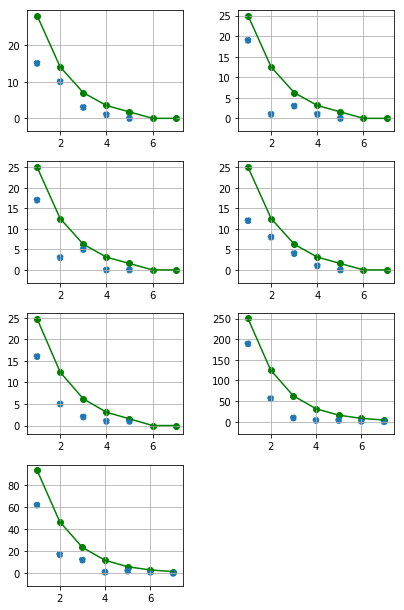

In [12]:
ind_max = 8
_results, _xi, _chi, _df = getNumberForEachRow(array, ind_max, bDebug = False, bDoTillZero=True, bShowPlot=True)

In [13]:
_results[0] # for the row of the first student

chararray([[b'010', b'28.0', b'15'],
           [b'0110', b'14.0', b'10'],
           [b'01110', b'7.0', b'3'],
           [b'011110', b'3.5', b'1'],
           [b'0111110', b'1.75', b'0'],
           [b'0', b'0', b'0'],
           [b'0', b'0', b'0']],
          dtype='|S8')

In [14]:
_xi

array([  13.        ,   16.7175    ,   14.7175    ,   12.1975    ,
         11.93292298,  144.67975384,   50.45648958])

In [15]:
_chi

[Power_divergenceResult(statistic=13.000000000000002, pvalue=0.011275793947331783),
 Power_divergenceResult(statistic=16.717500000000001, pvalue=0.0021931020736067949),
 Power_divergenceResult(statistic=14.717499999999999, pvalue=0.0053244753097910725),
 Power_divergenceResult(statistic=12.1975, pvalue=0.01594147161413046),
 Power_divergenceResult(statistic=11.932922979797981, pvalue=0.017857100348165733),
 Power_divergenceResult(statistic=144.67974828203771, pvalue=1.0302032112921091e-28),
 Power_divergenceResult(statistic=50.456488391587563, pvalue=3.8076064618990423e-09)]

In [16]:
_df

array([ 5.,  5.,  5.,  5.,  5.,  7.,  7.])

In [17]:
_pvalue_xi = list(1 - stats.chi2.cdf(_xi, _df)) #counted on our own

In [18]:
_pvalue = []  #counted in scipy
for x in _chi:
    _pvalue.append(x.pvalue)

___Almost the end:___ <br>_Now we can compare the p-values counted by hands and with scipy functions:_

In [19]:
_pvalue_xi

[0.023378768103563874,
 0.0050679307323675538,
 0.011640141887913291,
 0.032179531540500128,
 0.035718540423717582,
 0.0,
 1.1750495021445317e-08]

In [20]:
_pvalue

[0.011275793947331783,
 0.0021931020736067949,
 0.0053244753097910725,
 0.01594147161413046,
 0.017857100348165733,
 1.0302032112921091e-28,
 3.8076064618990423e-09]

___Conclusion:___ <br>_All the sequences of ones and zeroes are not generated randomly -> what says that it was generated by men_

___Вывод:___ <br>_Все последовательности имеют низкий уровень значимости -> значит, можно утверждать, что они сгенерированы не случайно, т.е. их сделал человек_